In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from umap import UMAP  

/home/bhui/miniconda3/envs/xy_py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [101]:
file_path = './prediction_results.xlsx'
data = pd.read_excel(file_path)
target_pos = 'attractive'
target_neg = 'unattractive'
label_pos = data[target_pos].copy()
label_neg = data[target_neg].copy()
binary_labels = np.where(label_pos > label_neg, True, False)
data_to_scale = data.drop([target_pos, target_neg], axis=1) 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_to_scale)

In [102]:
data.columns

Index(['unemotional', 'humble', 'boring', 'unhappy', 'emotUnstable',
       'egotistic', 'unintelligent', 'weird', 'unfriendly', 'emotional',
       'unattractive', 'happy', 'normal', 'introverted', 'uncertain',
       'uncommon', 'aggressive', 'familiar', 'calm', 'confident', 'common',
       'caring', 'friendly', 'unfamiliar', 'cold', 'interesting',
       'intelligent', 'memorable', 'trustworthy', 'emotStable', 'kind', 'mean',
       'forgettable', 'responsible', 'untrustworthy', 'attractive', 'typical',
       'irresponsible', 'atypical', 'sociable'],
      dtype='object')

In [103]:
data_PCA = PCA(n_components=2).fit_transform(data_scaled)
data_PCA = np.vstack((data_PCA.T, binary_labels)).T 
df_PCA = pd.DataFrame(data_PCA, columns=['Component_1', 'Component_2', target_pos]) 

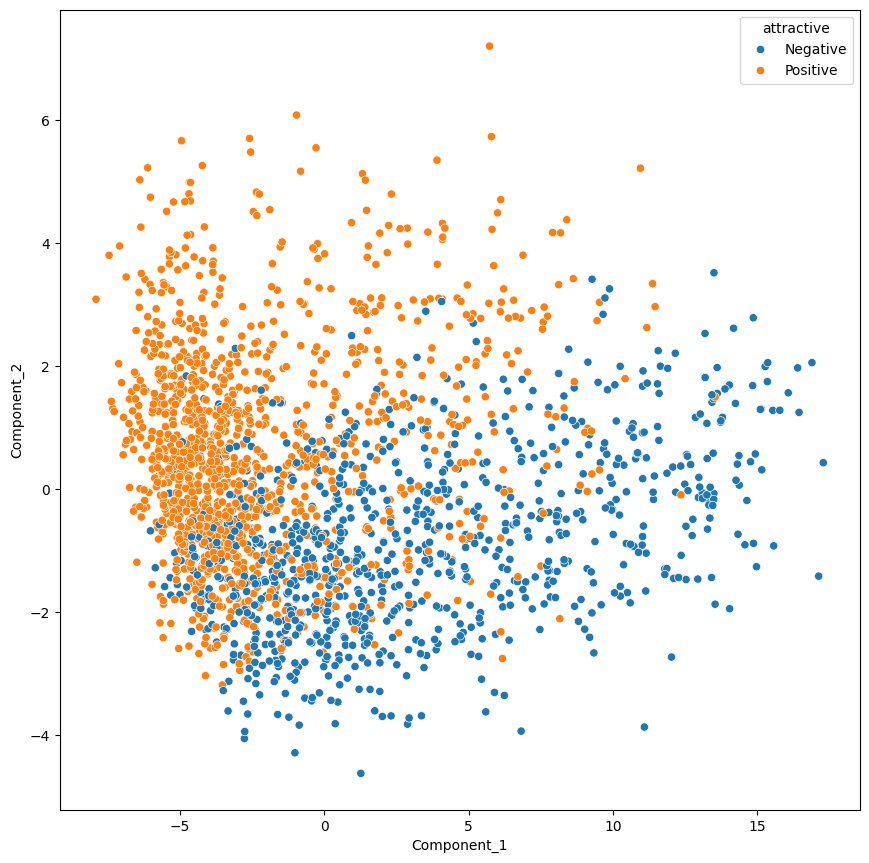

In [104]:
plt.figure(figsize=(8, 8)) 
pca_scatter = sns.scatterplot(data=df_PCA, hue=target_pos, x='Component_1', y='Component_2') 
handles, labels = pca_scatter.get_legend_handles_labels()
new_labels = ['Negative' if label == '0.0' else 'Positive' for label in labels]
plt.legend(handles, new_labels, title=target_pos)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig(f'pca_{target_pos}.jpg', bbox_inches='tight', pad_inches=0)
plt.show()

In [105]:
tsne = TSNE(n_components=2) 
data_TSNE = tsne.fit_transform(data_scaled) 
data_TSNE = np.vstack((data_TSNE.T, binary_labels)).T 
df_TSNE = pd.DataFrame(data_TSNE, columns=['Manifold_Dim_1', 'Manifold_Dim_2', target_pos]) 

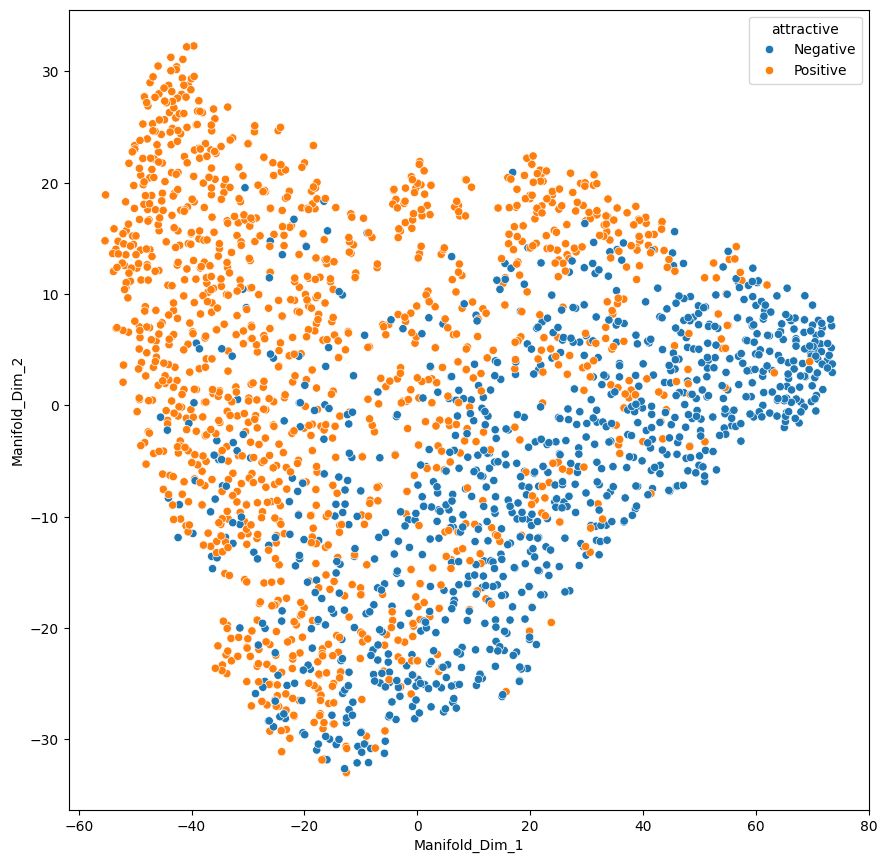

In [106]:
plt.figure(figsize=(8, 8)) 
tsne_scatter = sns.scatterplot(data=df_TSNE, hue=target_pos, x='Manifold_Dim_1', y='Manifold_Dim_2') 
handles, labels = tsne_scatter.get_legend_handles_labels()
new_labels = ['Negative' if label == '0.0' else 'Positive' for label in labels]
plt.legend(handles, new_labels, title=target_pos)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig(f'tsne_{target_pos}.jpg', bbox_inches='tight', pad_inches=0)
plt.show()

/home/bhui/miniconda3/envs/xy_py38/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


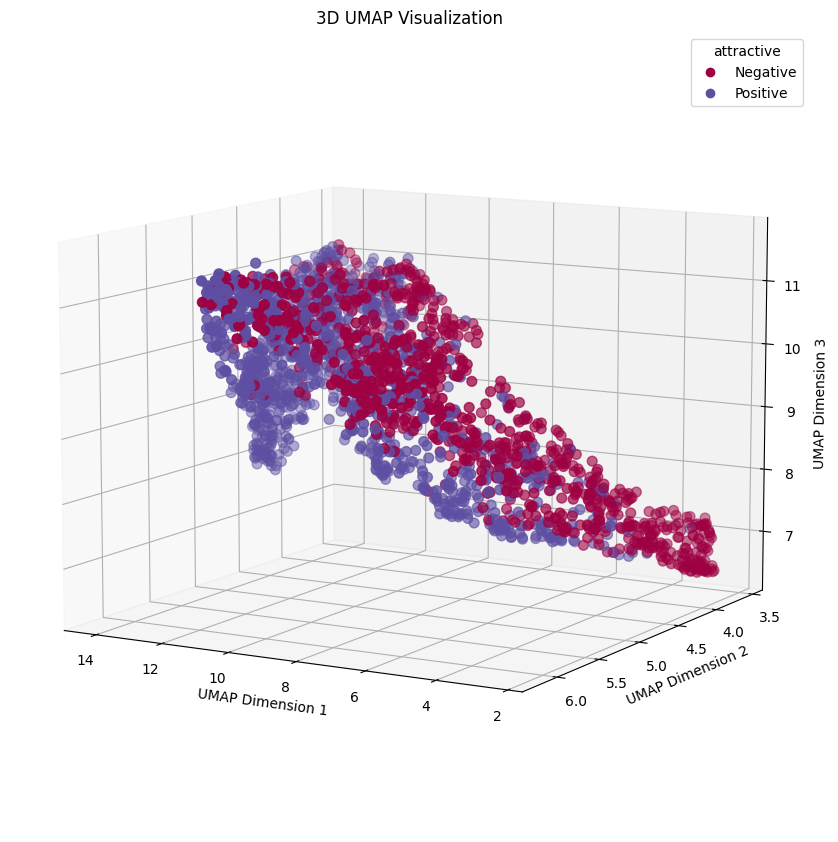

In [107]:
umap_3d = UMAP(n_components=3, n_neighbors=40, min_dist=0.1, random_state=42)
data_UMAP_3D = umap_3d.fit_transform(data_scaled)

df_UMAP_3D = pd.DataFrame(data_UMAP_3D, columns=['Dim_1', 'Dim_2', 'Dim_3'])
df_UMAP_3D[target_pos] = binary_labels  # Add the binary labels for coloring

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_UMAP_3D['Dim_1'], df_UMAP_3D['Dim_2'], df_UMAP_3D['Dim_3'], 
                     c=df_UMAP_3D[target_pos], cmap='Spectral', s=50)
ax.set_title('3D UMAP Visualization')
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')
ax.view_init(elev=10, azim=120)
plt.legend(handles=scatter.legend_elements()[0], labels=['Negative', 'Positive'], title=target_pos)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig(f'umap_{target_pos}.jpg', bbox_inches='tight', pad_inches=0)
plt.show()

/home/bhui/miniconda3/envs/xy_py38/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


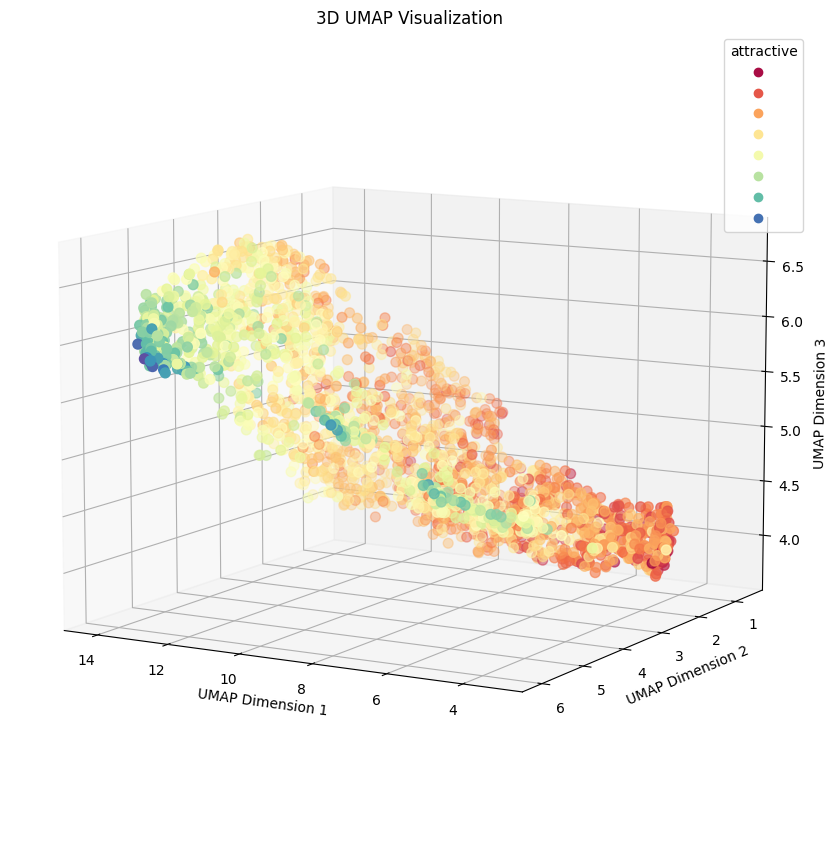

In [108]:
umap_3d = UMAP(n_components=3, n_neighbors=40, min_dist=0.1, random_state=42)
data_UMAP_scaled = scaler.fit_transform(data)
data_UMAP_3D = umap_3d.fit_transform(data_UMAP_scaled)

color_labels = data[target_pos].values

df_UMAP_3D = pd.DataFrame(data_UMAP_3D, columns=['Dim_1', 'Dim_2', 'Dim_3'])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_UMAP_3D['Dim_1'], df_UMAP_3D['Dim_2'], df_UMAP_3D['Dim_3'], c=color_labels
                     , cmap='Spectral', s=50)
ax.set_title('3D UMAP Visualization')
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')
ax.view_init(elev=10, azim=120)
plt.legend(handles=scatter.legend_elements()[0], title=target_pos)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig(f'umap.jpg', bbox_inches='tight', pad_inches=0)
plt.show()

In [56]:
from PIL import Image

In [57]:
image1 = Image.open(f'pca_{target_pos}.jpg')
image2 = Image.open(f'tsne_{target_pos}.jpg')
# image3 = Image.open(f'umap_{target_pos}.jpg')

In [58]:
image2 = image2.resize(image1.size)
# image3 = image3.resize(image1.size)
total_width = image1.width + image2.width
max_height = max(image1.height, image2.height)

In [59]:
combined_image = Image.new('RGB', (total_width, max_height))

# Paste the images next to each other on the blank image
combined_image.paste(image1, (0, 0))
combined_image.paste(image2, (image1.width, 0))
# combined_image.paste(image3, (image1.width + image2.width, 0))

# Save the combined image
combined_image_path = f'combined_image_{target_pos}.jpg'
combined_image.save(combined_image_path)